In [1]:
import re
class ExpandCPG:
    def __init__(self, cpg_line):
        self.cpg_list = cpg_line.rstrip().split("\t")
        self.start, self.end = [int(each) for each in self.cpg_list[2:4]]
        self.chr = self.cpg_list[1]
        self.out_list = self.expand_cpg()
    
    def expand_cpg(self):
        cpg = [self.chr, str(self.start), str(self.end)]
        shores = [self.chr, str(self.start - 2000), str(self.end + 2000)]
        shelves = [self.chr, str(self.start - 4000), str(self.end + 4000)]
        seas = [self.chr, str(self.start - 4000), str(self.start + 4000)]
        out_list = [cpg, shores, shelves, seas]
        return out_list

def analyse_cpg():
    in_link = open("cpgIslandExt.txt", "r")
    out_cpg = open("out_cpg.bed", "w")
    out_shores = open("out_shores.bed", "w")
    out_shelves = open("out_shelves.bed", "w")
    out_seas = open("out_seas.bed", "w")
    
    cp, shore, shelf, sea = "", "", "", ""
    
    for cpg_line in in_link:
        CpgObj = ExpandCPG(cpg_line)
        cpg = CpgObj.out_list[0]
        shores = CpgObj.out_list[1]
        shelves = CpgObj.out_list[2]
        seas = CpgObj.out_list[3]
        m = re.search(r'\d+', cpg[0])
        if m is not None:
            if cpg[0] == "chr" + m.group():
                cp = "\t".join(cpg) + "\n"
                out_cpg.write(cp)
                shore = "\t".join(shores) + "\n"
                out_shores.write(shore)
                shelf = "\t".join(shelves) + "\n"
                out_shelves.write(shelf)
                sea = "\t".join(seas) + "\n"
                out_seas.write(sea)
    out_cpg.close()
    out_shores.close()
    out_shelves.close()
    out_seas.close()
    in_link.close()

In [2]:
analyse_cpg()

In [3]:
class MethylationMiddleRange:
    def __init__(self, m_line):
        self.m_list = m_line.rstrip().split("\t")
        self.start, self.end = [int(each) for each in self.m_list[1:3]]
        self.chr = self.m_list[0]
        self.out_list = self.find_middle()
    
    def find_middle(self):
        dna_methyl_middle = [self.chr, str(self.start), str((self.start + self.end) // 2)]
        return dna_methyl_middle

def methyl_middle_range():
    dna_methylation = open("dnamethyl.bed", "r")
    methyl = open("methyl.bed", "w")
    
    for m_line in dna_methylation:
        mObj = MethylationMiddleRange(m_line)
        m = "\t".join(mObj.out_list) + "\n"
        methyl.write(m)
    methyl.close()

In [4]:
methyl_middle_range()

In [5]:
from pybedtools import BedTool
dna_methylation = BedTool('methyl.bed')
cpg_island = BedTool("out_cpg.bed")
shores = BedTool("out_shores.bed")
shelves = BedTool("out_shelves.bed")
seas = BedTool("out_seas.bed")

cpg = cpg_island.merge()
shore = shores.merge()
shelve = shelves.merge()
sea = seas.merge()

In [6]:
methylation_cpg_island = cpg.intersect(dna_methylation).count()
methylation_shores = shore.intersect(dna_methylation).count()
methylation_shelves = shelve.intersect(dna_methylation).count()
methylation_seas = sea.intersect(dna_methylation).count()
print(methylation_cpg_island, methylation_shores, methylation_shelves, methylation_seas)

146574 255209 300778 291804


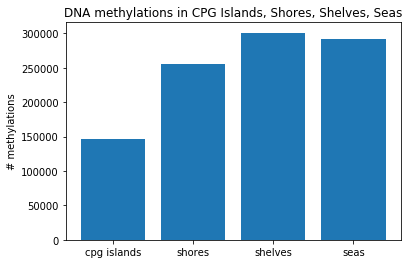

In [8]:
import matplotlib.pyplot as plt
import numpy as np

objects = ('cpg islands', 'shores', 'shelves', 'seas')
y_pos = np.arange(len(objects))
performance = [methylation_cpg_island, methylation_shores, methylation_shelves, methylation_seas]
plt.bar(y_pos,performance)
plt.xticks(y_pos, objects)
plt.ylabel('# methylations')
plt.title('DNA methylations in CPG Islands, Shores, Shelves, Seas')
plt.show()